# Simple Linear Regression

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

### Creating regression dataset

In [2]:
X, Y = make_regression(n_samples=300, n_features=1, noise=1.2, random_state=10)
print(X.shape, Y.shape)

(300, 1) (300,)


### Plotting dataset

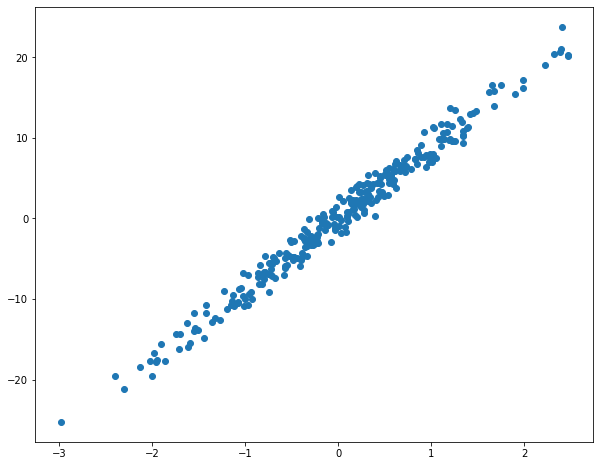

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(X.flatten(), Y)
plt.show()

### Splitting dataset into train and test

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(240, 1) (240,) (60, 1) (60,)


### Creating Simple Linear Regression class

In [5]:
class SimpleLinearRegression():
    def __init__(self):
        self.beta0 = 0
        self.beta1 = 0
    
    def fit(self, X, Y):
        X = np.array(X)
        X = X.reshape(-1,)
        Y = np.array(Y)
        
        x_mean = X.mean()
        y_mean = Y.mean()
        
        numerator = np.sum((X - x_mean) * (Y - y_mean))
        denominator = np.sum((X - x_mean)**2)
        self.beta1 = numerator/denominator
        self.beta0 = y_mean - self.beta1*x_mean
        
    def predict(self, X):
        X = np.array(X)
        X = X.reshape(-1,)
        return self.beta0 + self.beta1*X

### Create model instance, train it on train-dataset and evaluate it on test-dataset

In [6]:
model = SimpleLinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("R^2 score:", r2_score(Y_test, Y_pred))
print("Intercept:", model.beta0)
print("Coefficeint:", model.beta1)

R^2 score: 0.9800530919615534
Intercept: 0.05553517461179314
Coefficeint: 8.812290572733616


### Plotting regression line against test-set

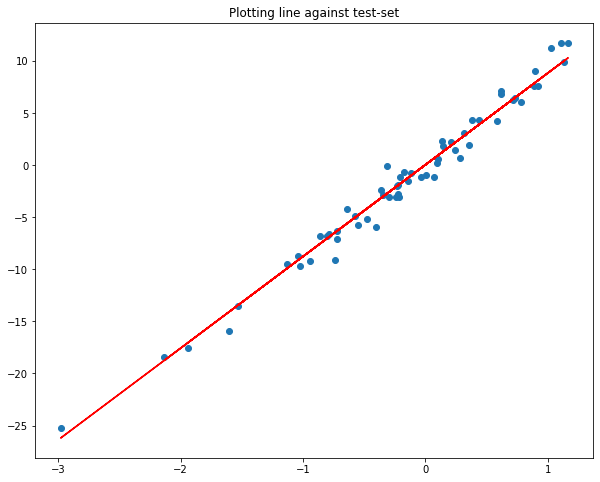

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Plotting line against test-set")
plt.scatter(X_test.flatten(), Y_test)
plt.plot(X_test, Y_pred, color="red")
plt.show()